# Linear Regression

## 1. Reading the data 

### A. Sample data: Bike Sharing Demand
- from Kaggle ([Description](https://www.kaggle.com/c/bike-sharing-demand/data))

In [1]:
import pandas as pd

# Read the data
data = pd.read_csv('data/bikeshare.csv')

In [2]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 2. Data preprocessing and exploring

### A. Extract year, month from datetime

In [3]:
# Year와 Month를 추출
datetime = pd.DatetimeIndex(data['datetime'])
data['year'] = datetime.year
data['month'] = datetime.month
data['hour'] = datetime.hour
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


### B. Data exploring 

In [4]:
# Number of points and variables
data.shape

(10886, 15)

In [5]:
# data type for each variable 
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
hour            int64
dtype: object

In [10]:
# Target variable is 'count'.
# What happens?
data.count

<bound method DataFrame.count of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
5      2011-01-01 05:00:00       1        0           0        2   9.84   
6      2011-01-01 06:00:00       1        0           0        1   9.02   
7      2011-01-01 07:00:00       1        0           0        1   8.20   
8      2011-01-01 08:00:00       1        0           0        1   9.84   
9      2011-01-01 09:00:00       1        0           0        1  13.12   
10     2011-01-01 10:00:00       1        0           0        1  15.58   
11     2011-01-01 11:00:00       1        0           0        1  1

In [13]:
# What happens?
data['count']

KeyError: 'count'

In [14]:
# "count" is a method, so it's best to name that column something else
data.rename(columns={'count':'total'}, inplace=True)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


In [15]:
# correlation matrix (ranges from 1 to -1)
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,year,month,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.380540


In [16]:
# Corrrelatuons with target variable 'total'
# data.corr().total
data.corr()['total']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
total         1.000000
year          0.260403
month         0.166862
hour          0.400601
Name: total, dtype: float64

### C. Data visualization

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002951B088160>,
      dtype=object)

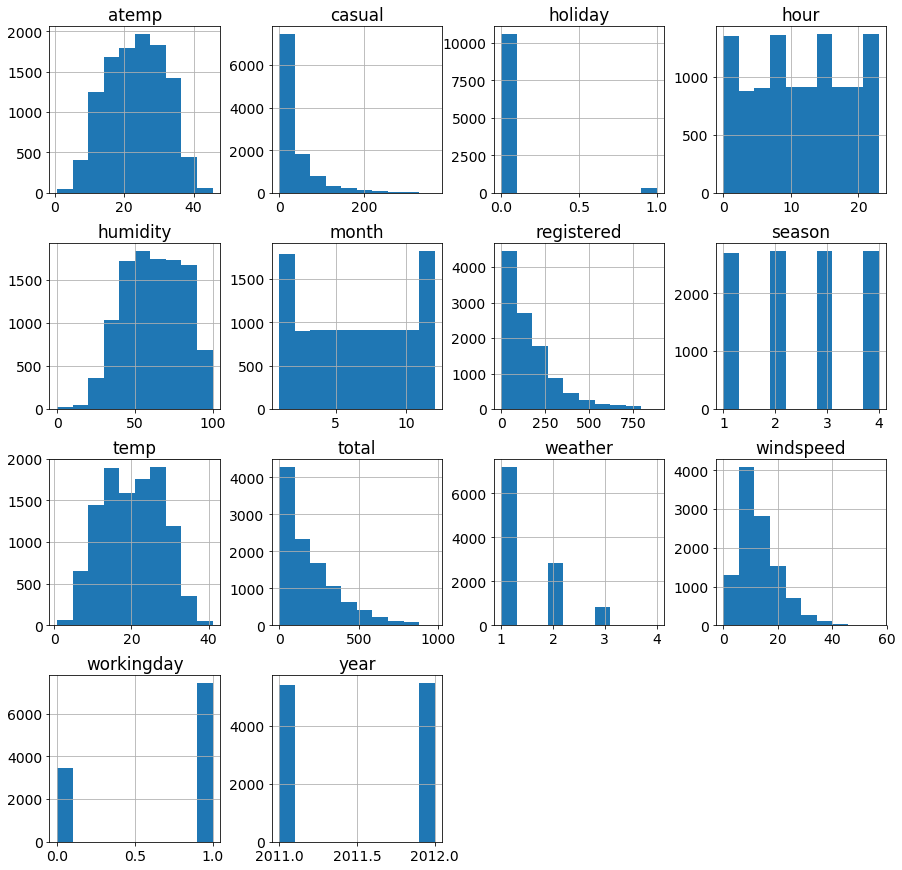

In [18]:
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 14
# Show histograms
data.hist()

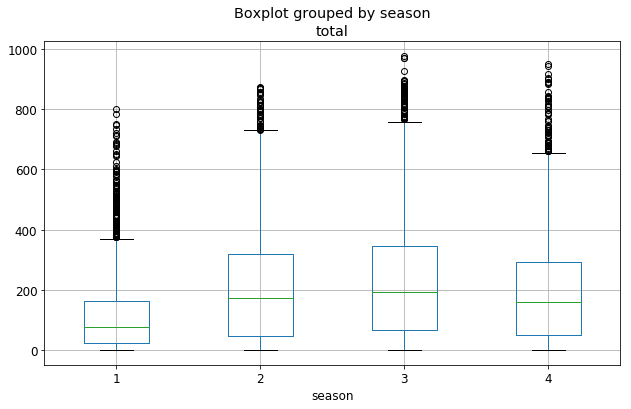

In [19]:
# box plot of rentals, grouped by season
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12
data.boxplot(column='total', by='season')

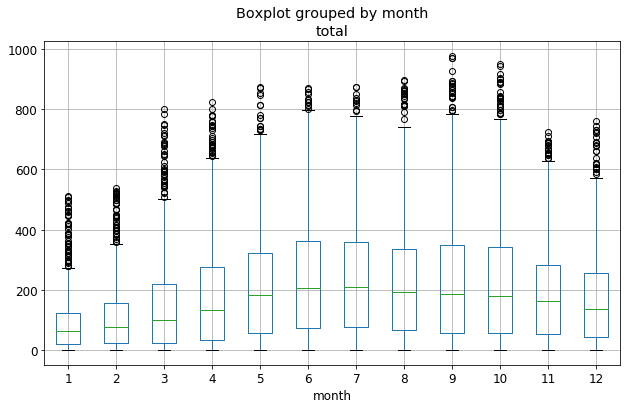

In [20]:
# box plot of rentals, grouped by month
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12
data.boxplot(column='total', by='month')

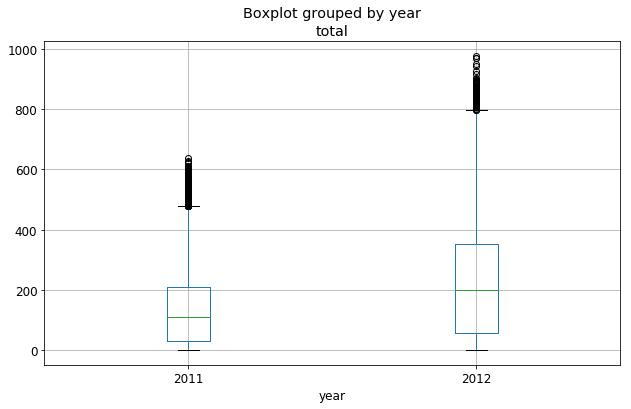

In [21]:
# box plot of rentals, grouped by year
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12
data.boxplot(column='total', by='year')

### D. Handling nominal variables
- Season의 경우, 1부터 4까지의 값이 특정 계절을 의미하므로 numerical한 type이 아님.
- 이러한 경우 1-of-C coding으로 binary dummy variables를 만들 필요가 있음

In [22]:
test = pd.get_dummies(data=data['season'])

In [26]:
test.sample(n=5)

,1,2,3,4
8082,0,1,0,0
8331,0,0,1,0
4346,0,0,0,1
935,1,0,0,0
3878,0,0,1,0


In [27]:
# season_dummies = pd.get_dummies(data.season)
season_dummies = pd.get_dummies(data.season, prefix='season')
season_dummies.sample(n = 5, random_state=1)

,season_1,season_2,season_3,season_4
3709,0,0,1,0
6741,1,0,0,0
9848,0,0,0,1
1410,0,1,0,0
10672,0,0,0,1


- Category가 4개인 경우, binray dummy variables이 4개 생성됨.
- 그러나 실제로는 binary dummy variable 3개로 모든 케이스를 설명할 수 있다.
- 만약 변수 선택 과정이 모델에 포함이 되어 있거나, 설명력이 중요한 경우에는 4개의 변수를 모두 넣을 수 있음.
- 만약 변수의 수가 많아지는 것을 방지하고자 한다면, 하나의 dummy variable을 제거할 수 있음.

In [28]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
3709,0,1,0
6741,0,0,0
9848,0,0,1
1410,1,0,0
10672,0,0,1


In [29]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, season_dummies], axis=1)

# print 5 random rows
data.sample(n=5, random_state=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,year,month,hour,season_2,season_3,season_4
3709,2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,2011,9,11,0,1,0
6741,2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,2012,3,4,0,0,0
9848,2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,2012,10,17,0,0,1
1410,2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,2011,4,15,1,0,0
10672,2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,2012,12,2,0,0,1


### E. Making derivative variables (유도변수)
- **daytime**: as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

In [30]:
data['daytime'] = ((data.hour > 6) & (data.hour < 21))

In [31]:
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,year,month,hour,season_2,season_3,season_4,daytime
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,0,0,0,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,0,0,0,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,0,0,0,False


In [32]:
data['daytime'] = ((data.hour > 6) & (data.hour < 21)).astype(int)

In [33]:
data.sample(n=10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,year,month,hour,season_2,season_3,season_4,daytime
1241,2011-03-16 13:00:00,1,0,1,2,16.40,20.455,76,8.9981,18,81,99,2011,3,13,0,0,0,1
807,2011-02-17 02:00:00,1,0,1,2,13.94,15.910,53,15.0013,2,4,6,2011,2,2,0,0,0,0
72,2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,2,2011,1,4,0,0,0,0
7679,2012-05-19 08:00:00,2,0,0,1,21.32,25.000,52,11.0014,33,162,195,2012,5,8,1,0,0,1
10244,2012-11-12 06:00:00,4,1,0,1,15.58,19.695,87,7.0015,7,64,71,2012,11,6,0,0,1,0
9864,2012-10-15 09:00:00,4,0,1,3,24.60,29.545,69,26.0027,31,328,359,2012,10,9,0,0,1,1
3094,2011-07-17 20:00:00,3,0,0,1,31.16,35.605,58,16.9979,85,177,262,2011,7,20,0,1,0,1
3207,2011-08-03 13:00:00,3,0,1,2,31.16,35.605,58,15.0013,37,107,144,2011,8,13,0,1,0,1
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,2011,1,4,0,0,0,0
7977,2012-06-12 18:00:00,2,0,1,1,27.88,31.820,83,12.9980,57,596,653,2012,6,18,1,0,0,1


In [35]:
# Check the correlation between 'total' and 'daytime'
data.corr().total

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
total         1.000000
year          0.260403
month         0.166862
hour          0.400601
season_2      0.075681
season_3      0.136942
season_4      0.023704
daytime       0.597553
Name: total, dtype: float64

## 3. Building a linear regression model 

### A. Simple linear regression
- Correlation보고 임의의 입력변수를 선택해봅시다.

In [36]:
# Show all variable names
list(data.columns.values)

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total',
 'year',
 'month',
 'hour',
 'season_2',
 'season_3',
 'season_4',
 'daytime']

In [37]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,year,month,hour,season_2,season_3,season_4,daytime
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.006546,-0.262801,0.255939,0.774867,-0.005797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.000354,-0.038250,0.022790,0.022751,-0.000269
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.002780,0.014620,-0.007194,-0.007048,0.002281
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.022740,0.004157,-0.047316,0.037771,0.011727
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.145430,0.192661,0.635975,-0.266220,0.164638
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.140343,0.204421,0.607090,-0.245690,0.155730
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.278011,-0.031095,0.067308,0.129018,-0.331914
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.146631,0.042991,-0.091521,-0.079535,0.209527
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.302045,0.132405,0.187726,-0.086258,0.440110
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.380540,0.046969,0.102142,0.056961,0.571080


In [38]:
data.corr().total

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
total         1.000000
year          0.260403
month         0.166862
hour          0.400601
season_2      0.075681
season_3      0.136942
season_4      0.023704
daytime       0.597553
Name: total, dtype: float64

- 선택변수: temp, weather, humidity, season_2, season_3, season_4, daytime

In [39]:
selected = ['temp', 'weather', 'humidity', 'season_2', 'season_3', 'season_4', 'daytime']

In [40]:
X = data[selected]
Y = data['total']

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
LinearRegression?

In [45]:
# create X and Y
X = data[selected]
Y = data.total

# Initiate the linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# Fit the model
linreg.fit(X,Y)

# Print the coefficients
print(linreg.intercept_)
print(linreg.coef_)
print(selected)

6.472235117777473
[  7.31932911 -21.45709068  -1.1016447   30.11977785   8.0152879
  65.73897561 186.95712277]
['temp', 'weather', 'humidity', 'season_2', 'season_3', 'season_4', 'daytime']


### B. Normalize the data
- 모든 변수의 값이 0 이상 1 이하 안에 들어가도록 변동
- 그 후에 각 변수의 계수를 살펴보자.

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

C:\Users\tkim29\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
print(rescaledX)

[[0.2244898  0.         0.81       ... 0.         0.         0.        ]
 [0.20408163 0.         0.8        ... 0.         0.         0.        ]
 [0.20408163 0.         0.8        ... 0.         0.         0.        ]
 ...
 [0.32653061 0.         0.61       ... 0.         1.         0.        ]
 [0.32653061 0.         0.61       ... 0.         1.         0.        ]
 [0.30612245 0.         0.66       ... 0.         1.         0.        ]]


In [49]:
linreg_2 = LinearRegression()
linreg_2.fit(rescaledX, Y)

print(linreg_2.intercept_)
print(linreg_2.coef_)
print(selected)

-8.983005686642429
[ 294.09064377  -64.37127203 -110.16446999   30.11977785    8.0152879
   65.73897561  186.95712277]
['temp', 'weather', 'humidity', 'season_2', 'season_3', 'season_4', 'daytime']


Evaluation

In [50]:
Y_pred = linreg.predict(X)
Y_pred_2 = linreg_2.predict(rescaledX)

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [52]:
print(mean_squared_error(Y, Y_pred))
print(mean_squared_error(Y, Y_pred_2))

16845.170874669766
16845.170874669766


In [53]:
# Compare linreg and linreg_2 in respect to training_RMSE
Y_pred = linreg.predict(X)
Y_pred_2 = linreg_2.predict(rescaledX)

import numpy as np
from sklearn import metrics

training_RMSE = np.sqrt(metrics.mean_squared_error(Y, Y_pred))
training_RMSE_2 = np.sqrt(metrics.mean_squared_error(Y, Y_pred_2))

In [54]:
print('Original scale - Training_RMSE: ', training_RMSE)
print('Normalized scale - Training_RMSE: ', training_RMSE_2)

Original scale - Training_RMSE:  129.7889474287767
Normalized scale - Training_RMSE:  129.7889474287767


### Note: Performance metrics for regression model

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [55]:
# example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [56]:
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.7386127875258306


## C. Spliting the data and Evaluating the model
- 앞에서는 데이터를 학습/테스트 셋으로 나누지 않고 선형회귀모델을 학습
- 여기에서는 데이터를 학습/테스트 셋으로 나누고 선형회귀모델의 **예측 성능**을 평가

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Training set: 70%, Test set: 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10886, 7)
(10886,)
(7620, 7)
(7620,)
(3266, 7)
(3266,)


In [59]:
linreg = LinearRegression()

# Fit the model using training set
linreg.fit(X_train, Y_train)

# Calculate predicted Y using X of test set
Y_train_pred = linreg.predict(X_train)
Y_test_pred = linreg.predict(X_test)

# Calculate RMSE in training/test sets
training_RMSE = np.sqrt(metrics.mean_squared_error(Y_train,
                                                   Y_train_pred))
test_RMSE = np.sqrt(metrics.mean_squared_error(Y_test, 
                                               Y_test_pred))

In [60]:
print('Training_RMSE: ', training_RMSE)
print('Test_RMSE: ', test_RMSE)

Training_RMSE:  129.4390867861176
Test_RMSE:  130.65896965790733


In [61]:
print(metrics.r2_score(Y_train, Y_train_pred))
print(metrics.r2_score(Y_test, Y_test_pred))

0.4914912514551305
0.4745050547877111


### D. Comparing models using RMSE in test set

In [71]:
# define a function that accepts a list of features and returns test RMSE
def train_test_rmse(d, feature_cols):
    X = d[feature_cols]
    Y = d.total
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, Y_train)
    Y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

In [76]:
# Compare different sets of features
print(train_test_rmse(data, ['temp', 'weather', 'humidity', 'season_2', 'season_3', 'season_4', 'daytime']))
print(train_test_rmse(data, ['temp', 'humidity', 'season_2', 'season_3', 'season_4', 'daytime']))
print(train_test_rmse(data, ['daytime']))
print(train_test_rmse(data, ['daytime','weather','season_2']))
print(train_test_rmse(data, ['daytime','weather','humidity']))

130.65896965790733
131.28284223026924
145.04331501931168
142.05199245446647
142.1681632461654


In [77]:
# How about this model?
print(train_test_rmse(data, ['casual', 'registered']))

7.291276545038069e-14


### Adding more features
- 시간대를 데이터로 넣으면 어떨까?

In [78]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(data.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
data = pd.concat([data, hour_dummies], axis=1)

In [79]:
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
data.columns.str.startswith('hour_')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [81]:
data.columns[data.columns.str.startswith('hour_')]

Index(['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23'],
      dtype='object')

In [84]:
hour_cols = list(data.columns[data.columns.str.startswith('hour_')])

In [85]:
print(train_test_rmse(data, hour_cols ))

128.66235530712038
